In [44]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [45]:
torch.manual_seed(42)

In [66]:
def gen_act_grads(init_type = "rand", act_func=nn.Tanh, var=0.01):
    dims = [4096] * 7
    activations = []
    gradients = []

    x = torch.randn(16, dims[0])
    layers = []
    for d_in, d_out in zip(dims[:-1], dims[1:]):
        linear = nn.Linear(d_in, d_out)

        if init_type == "rand":
            nn.init.normal_(linear.weight, mean=0.0, std=var)
        elif init_type == "xavier":
            nn.init.xavier_normal_(linear.weight)
        elif init_type == "kaiming":
            nn.init.kaiming_normal_(linear.weight)
        else:
            raise ValueError("Unknown initialization type")

        layers.append(linear)
        layers.append(act_func())

    model = nn.Sequential(*layers)
    x_temp = x.clone()
    for layer in model:
        x_temp = layer(x_temp)
        if isinstance(layer, act_func):
            activations.append(x_temp.detach().clone())

    loss = x_temp.sum()
    loss.backward()

    # Collect gradients
    for layer in model:
        if isinstance(layer, nn.Linear):
            gradients.append(layer.weight.grad.detach().clone())

    return activations, gradients


def plot_activations(activations, gradients):
    fig, axs = plt.subplots(2, len(activations), figsize=(20, 8))
    for i, h in enumerate(activations):
        axs[0, i].hist(h.flatten(), bins=100)
        axs[0, i].set_title(f"Layer {i+1}")
        axs[0, i].set_xlim(-1.05, 1.05)

    for i, g in enumerate(gradients):
        axs[1, i].hist(g.flatten(), bins=100)
        axs[1, i].set_title(f"Layer {i+1}")
        axs[1, i].set_xlim(-1.05, 1.05)

    plt.tight_layout()
    plt.show()

# Random initialization

## Small variance

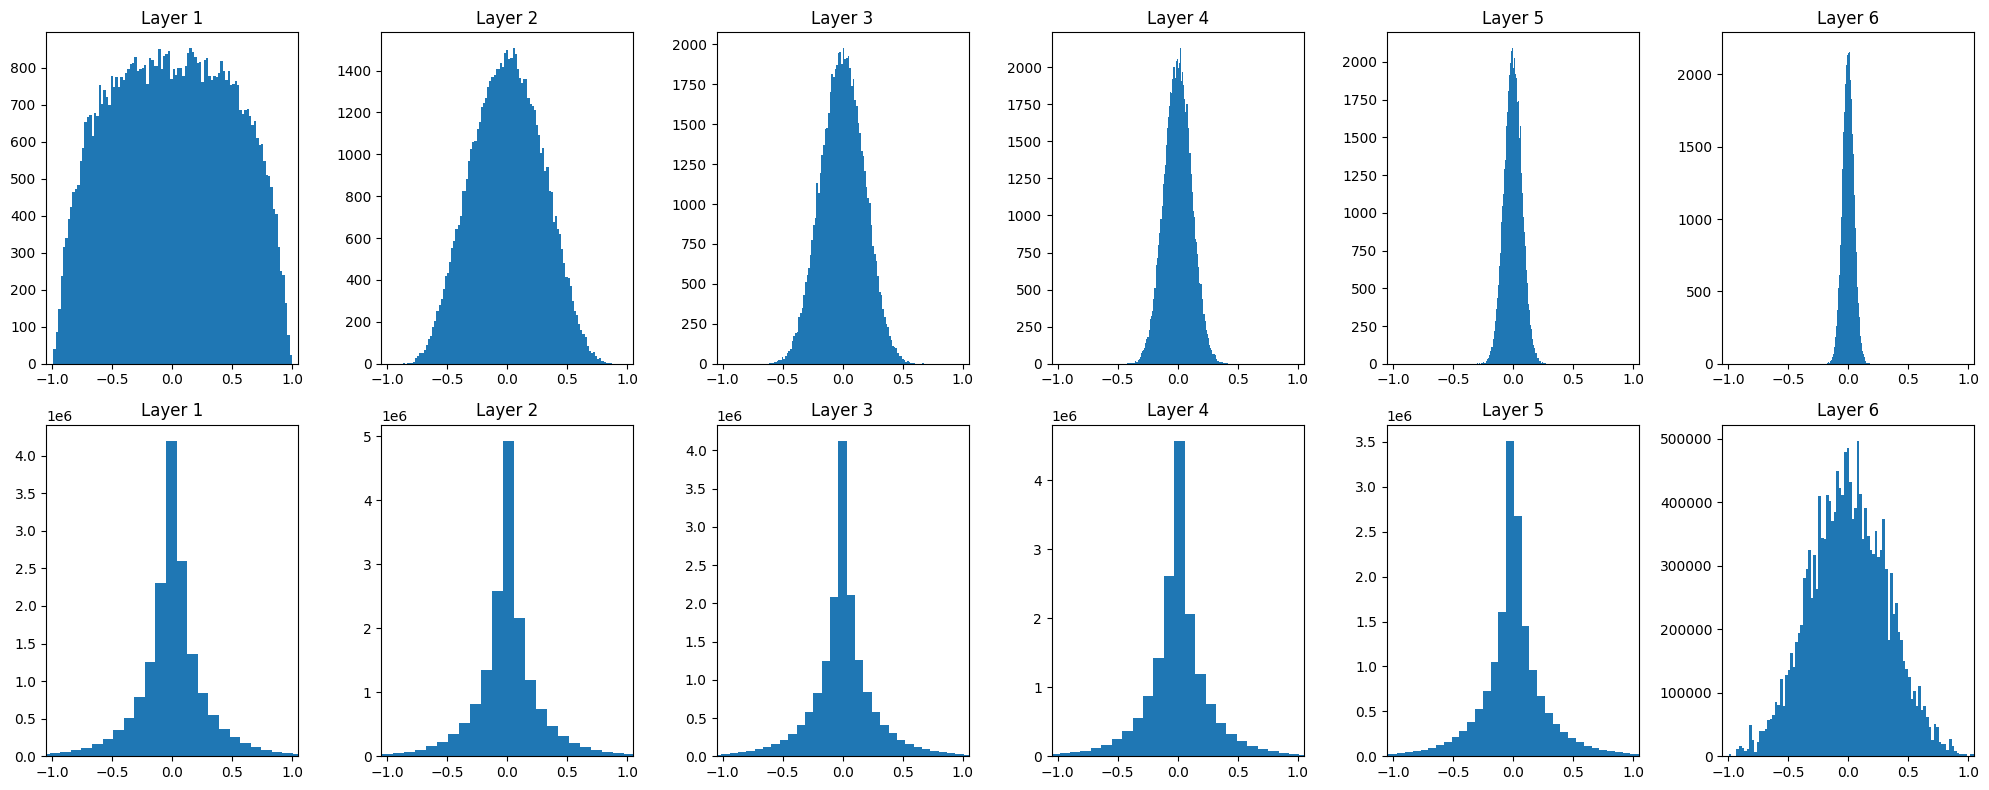

In [67]:
activations, gradients = gen_act_grads("rand", nn.Tanh, 0.01)
plot_activations(activations, gradients)

## Large variance

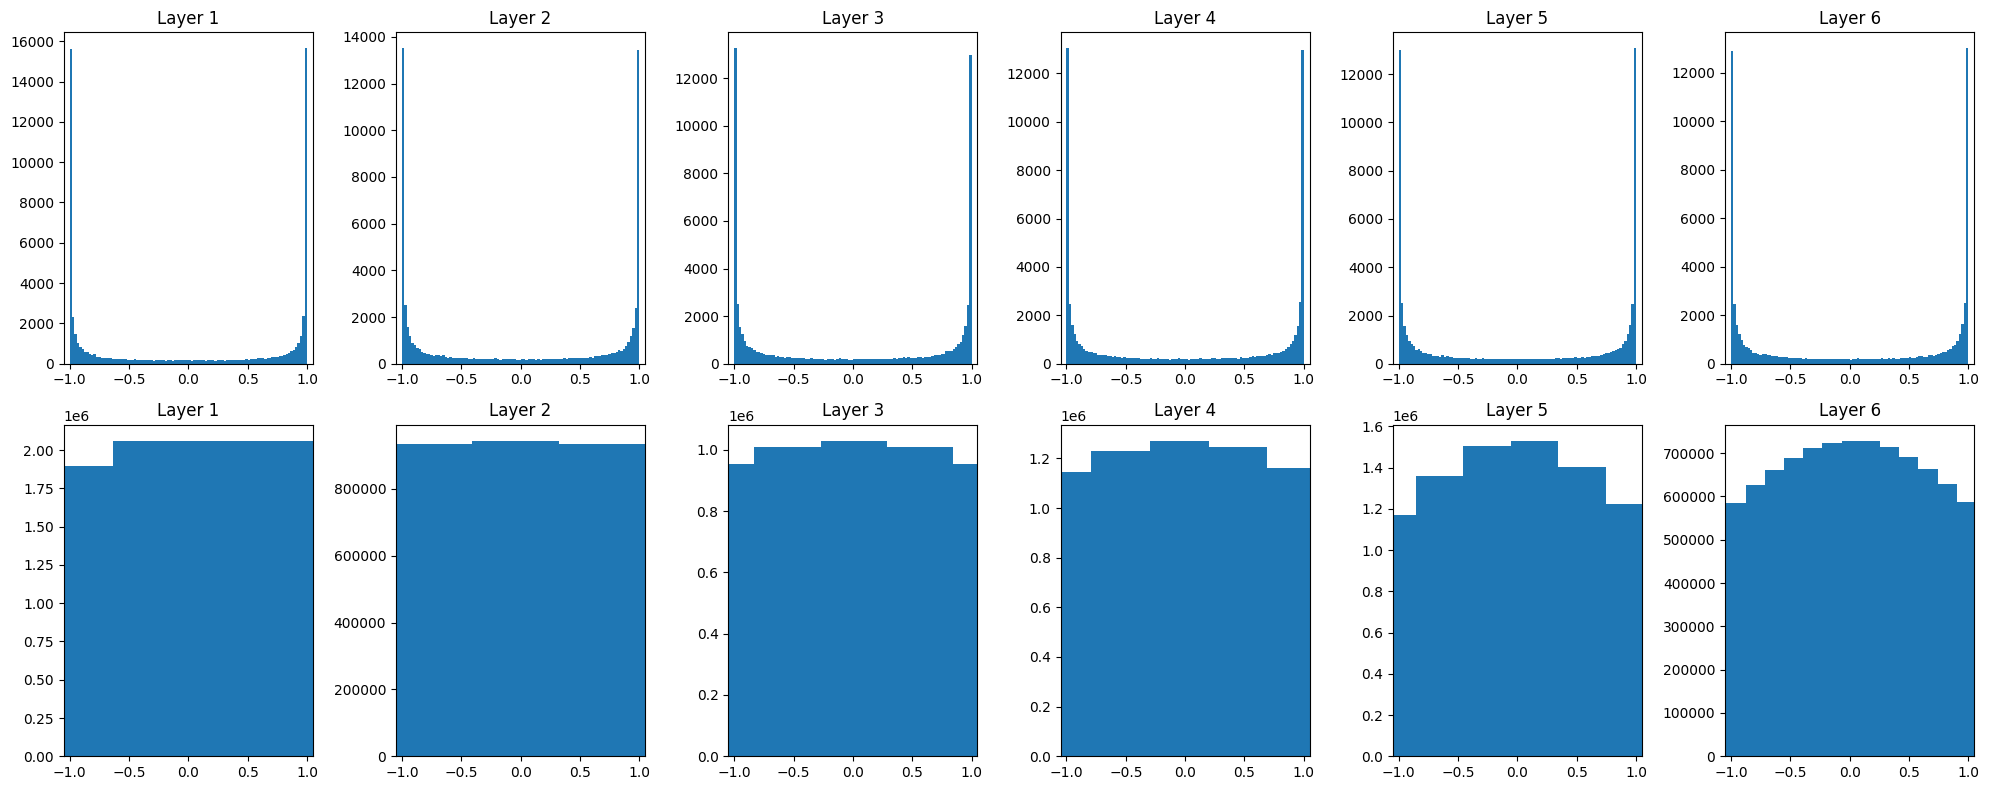

In [60]:
activations, gradients = gen_act_grads("rand", nn.Tanh, 0.05)
plot_activations(activations, gradients)

# Xavier initialization

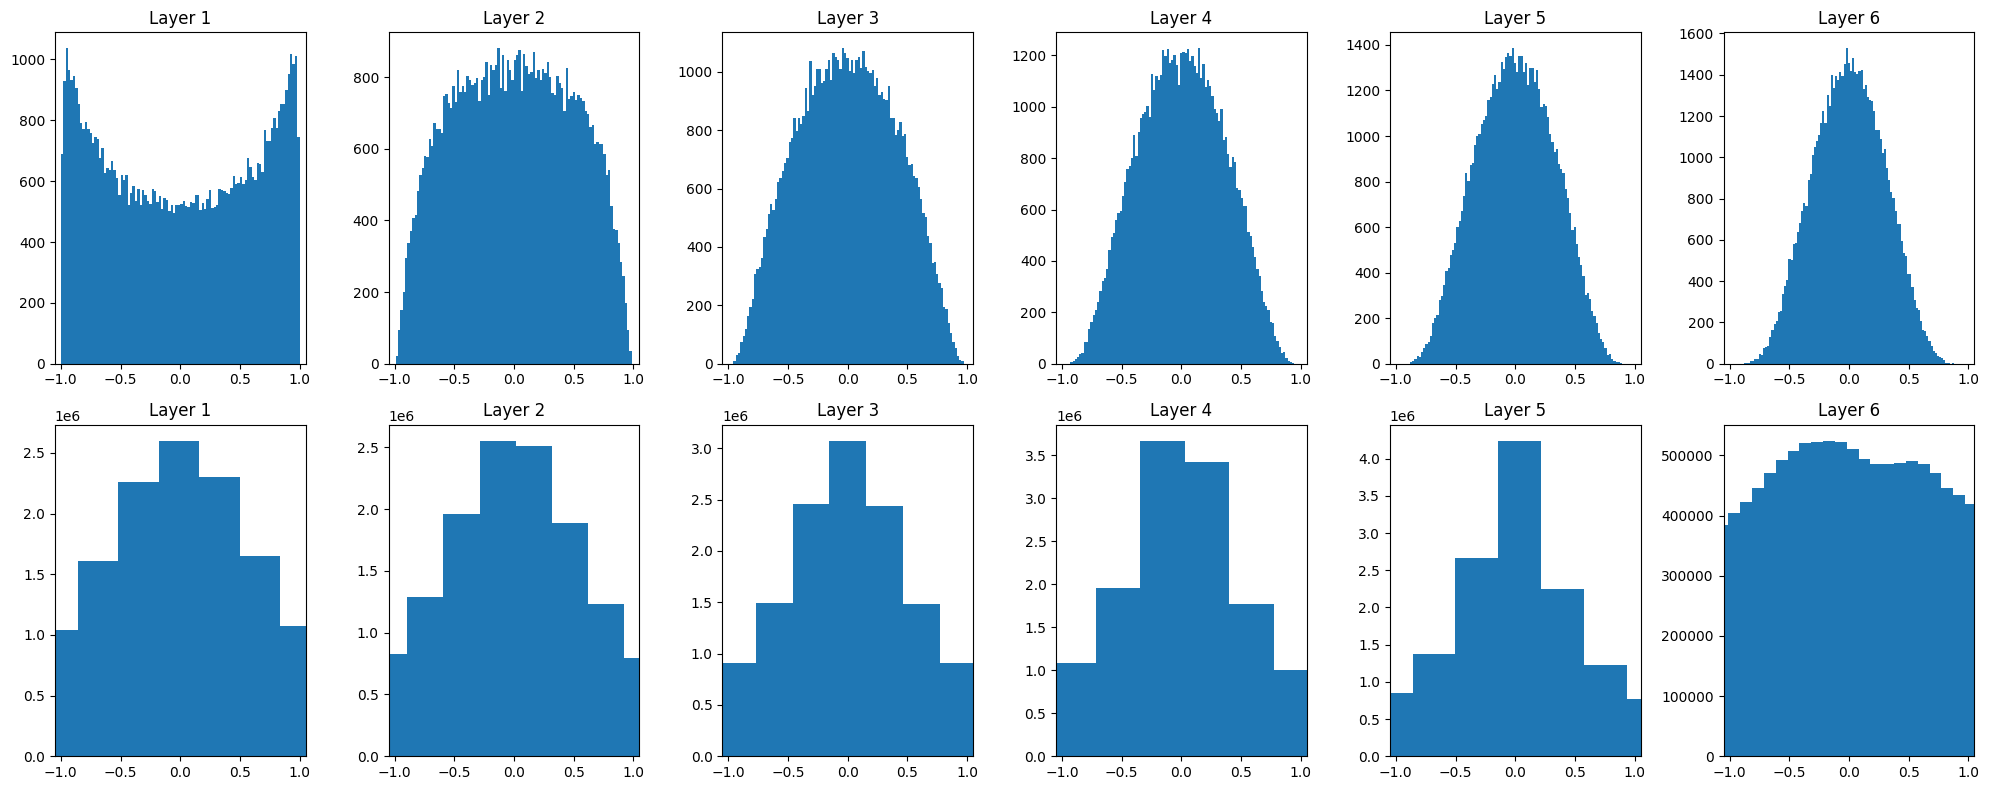

In [68]:
activations, gradients = gen_act_grads("xavier", nn.Tanh, 0.01)
plot_activations(activations, gradients)

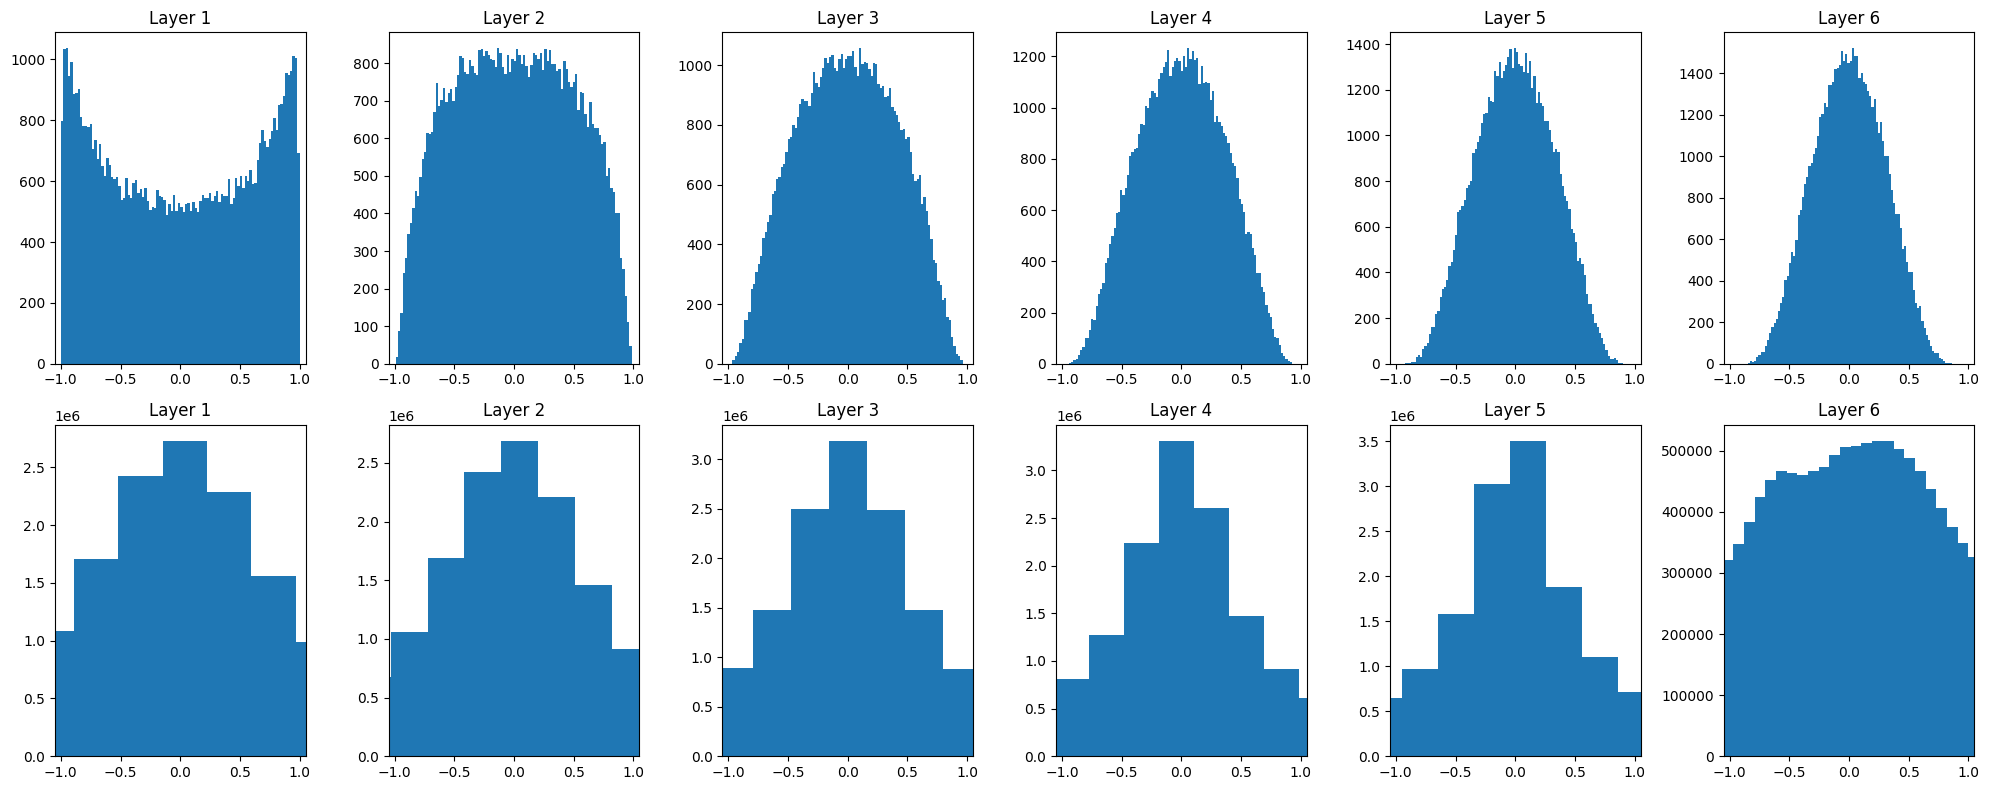

In [69]:
activations, gradients = gen_act_grads("xavier", nn.Tanh, 0.05)
plot_activations(activations, gradients)

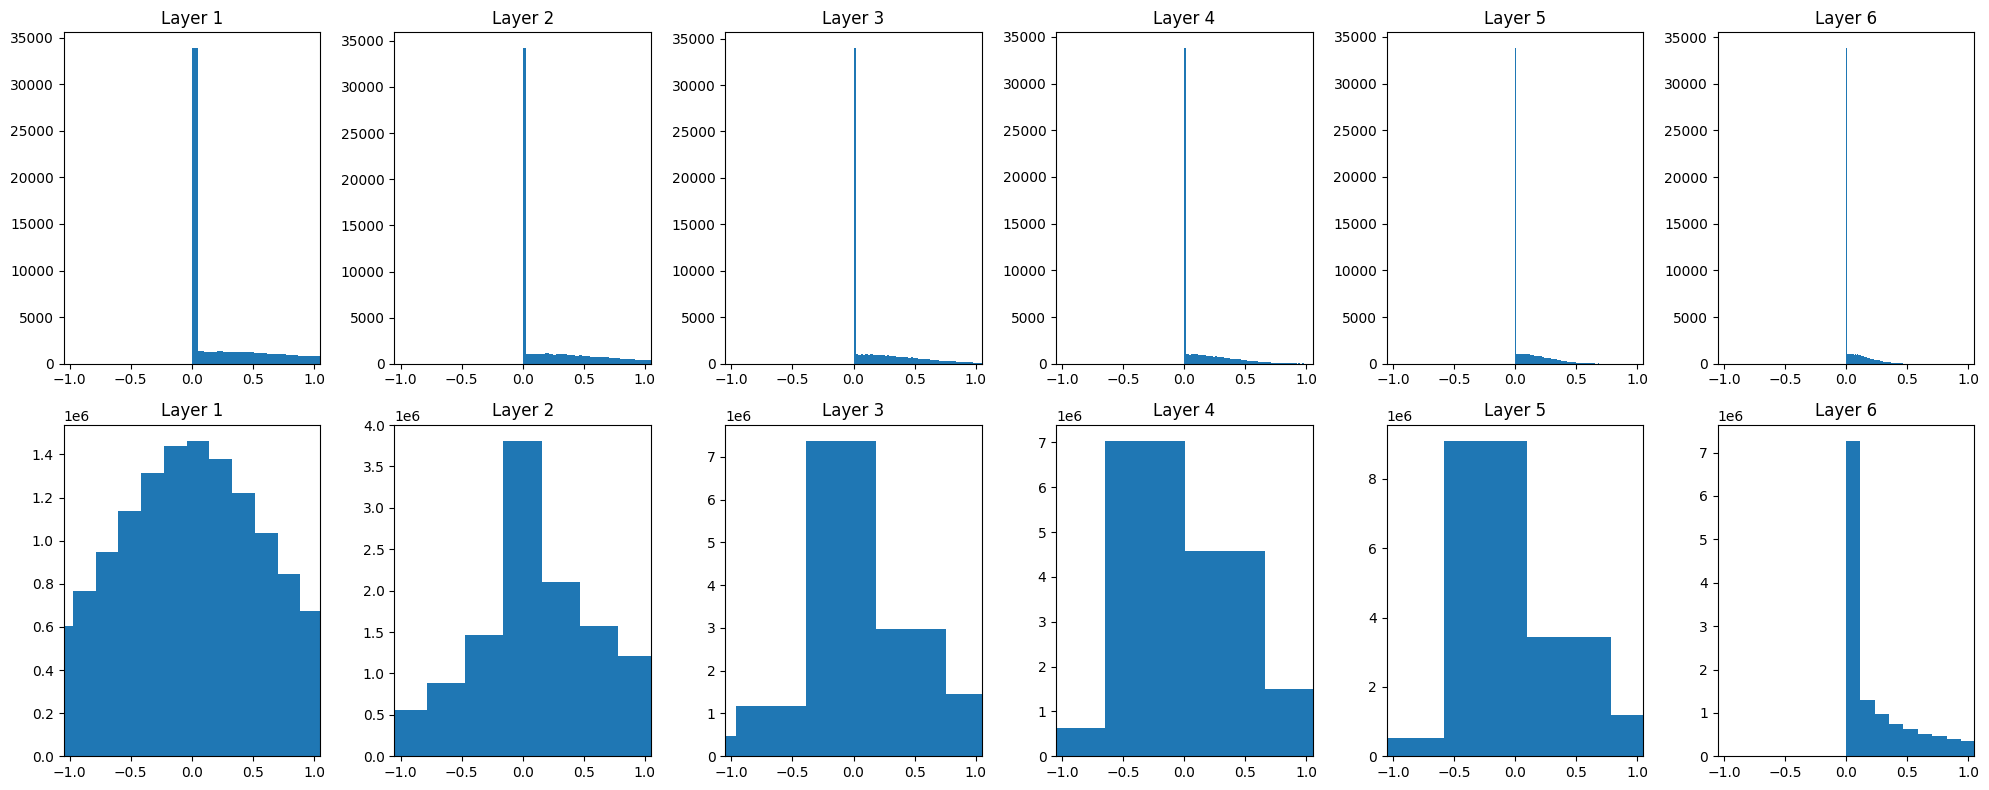

In [70]:
activations, gradients = gen_act_grads("xavier", nn.ReLU, 0.01)
plot_activations(activations, gradients)

# Kaiming initialization

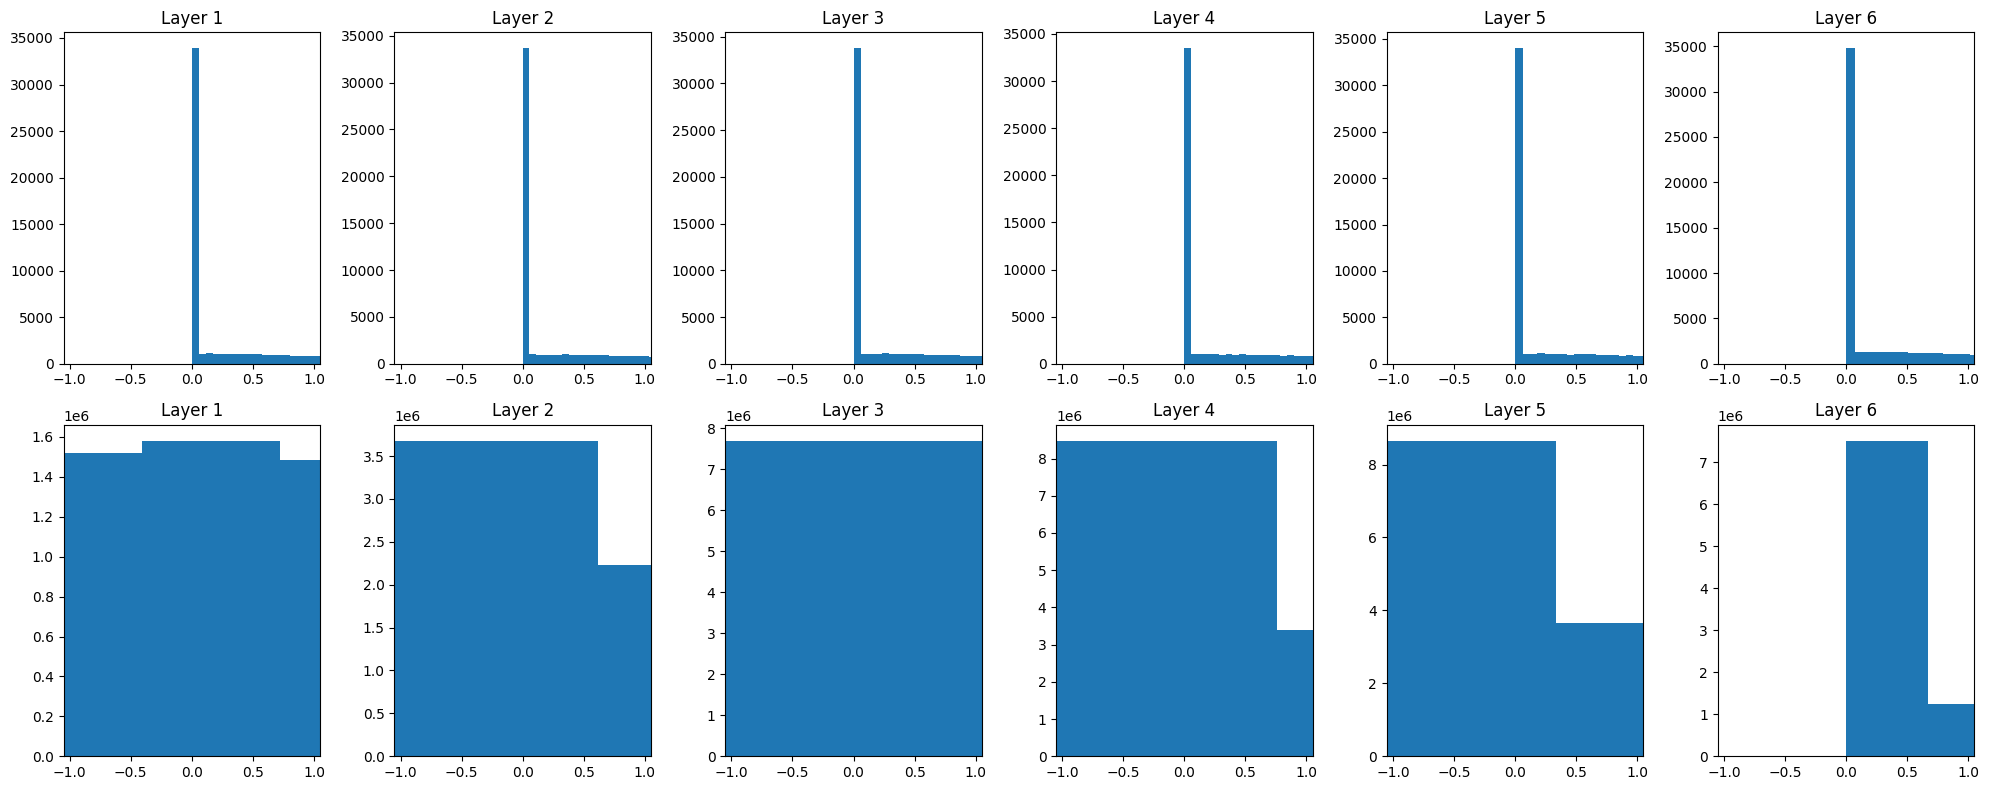

In [72]:
activations, gradients = gen_act_grads("kaiming", nn.ReLU, 0.01)
plot_activations(activations, gradients)